***
# <center><font color=blue size=8>Analysis on credit card customers</font></center>

<center><img alt="" src="https://drive.google.com/uc?id=1ZS3uX2vn82mgIz_VsvdvlM1QYftPfDXt&export=download" align="center" hspace="10px" vspace="10px" width="900" height="1100" ></center>

***

## <font color=blue>Introduction</font>
***

Credit cards are a popular way of payment in modern society. Being a flexible way of payment, where you can store money or use borrowed funds from a financial institution, when you use credit cards you don't need to carry physical money. There is also different types of cards, which with its own benefits, like discounts, cash back, protection agains frauds and others.

This EDA(Exploratory Data Analysis) project tries to analyze and get a glimpse on credit cards users. The dataset comes from a public dataset on Kaggle, from the user Sakshi Goyal. The dataset contains customer age, gender, schooling, income category, and others. 

Using data analysis techniques, we will clean, explore and do inferences in the dataset to get a general understanding of the demographics informations of customers in our data.  

### <font color=blue>Importing and installing packages</font>
***

Let's begin by importing those following libraries for our analysis:
- Pandas
- Numpy
- Seaborn
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We will also install and import the `opendatasets` that is a Python library for downloading datasets from online sources.

In [2]:
pip install opendatasets --upgrade

     |████████████████████████████████| 58 kB 4.4 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 3.1 MB/s             
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b8fce793bc59177be8585bf5229d7279d3ab2e43eabc2aa8596fbbfb6ddf685e
  Stored in directory: /home/jovyan/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

Let's download our dataset from Kaggle, to replicate this you need to create an API token in the [Kaggle Website](https://www.kaggle.com/) to have a username and Key to download any of their datasets.

In [4]:
od.download('https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: detectiveedogawa
Your Kaggle Key: ········


100%|██████████| 379k/379k [00:00<00:00, 98.2MB/s]

Importing the `os` library to manipulate our files we can check if the file has been downloaded.

In [5]:
import os
os.listdir('credit-card-customers/')

['BankChurners.csv']

### <font color=blue>Loading the dataset</font>
***

Now we will read our csv and convert to a pandas `DataFrame` type variable

In [6]:
credit_card_customers_df = pd.read_csv('credit-card-customers/BankChurners.csv')

## <font color=blue>Data Preparation and Cleaning</font>
***

Preparing and cleaning data is important in any EDA project, because it ensures the data accuracy and consistency, and you can also select the data that you will work with. With a good preparation in the data we can get better insights that can improve our analysis and decision making based on the dataset.


### <font color=blue>Selecting Columns and Removing Duplicates</font>

To prepare our data for further analysis we will explore superficially the dataset, searching for invalid data and performing any necessary additional steps like parsing, adding and removing columns, getting general information and descriptions about the data.

There are two columns that are not useful to our analysis, the two last ones, so we will start by removing them from our dataset.

In [7]:
credit_card_customers_df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                    axis = 'columns', 
                    inplace = True)
credit_card_customers_df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
                    axis = 'columns', 
                    inplace = True)

Now we will start to look more carefully in the remaining DataFrame, first using the pandas method `info`, that gives general information about the columns.

In [77]:
credit_card_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

We can see that there is still a lot of columns in our dataframe, what we want in this EDA is to get a better understanding on the people that uses credit cards from this dataset, so we will discard a few columns to match this specific analysis.
We will get into a data frame structure only the columns that we will use, that are the following: 
- Customer_Age 
- Gender
- Dependent_count
- Education_Level
- Marital_Status
- Income_Category
- Card_Category
- Months_on_book
- Credit_Limit

In [8]:
customers_df = credit_card_customers_df[['Customer_Age', 
                                                'Gender', 
                                                'Dependent_count', 
                                                'Education_Level', 
                                                'Marital_Status', 
                                                'Income_Category', 
                                                'Card_Category', 
                                                'Months_on_book', 
                                                'Credit_Limit']]

Now we will check for duplicates within the original data frame to make sure we are not letting pass anything

In [19]:
credit_card_customers_df.duplicated().value_counts()

False    10127
dtype: int64

In [20]:
customers_df.duplicated().value_counts()

False    10126
True         1
dtype: int64

There is one duplicate in the new data frame that we are using, but there is none on the original data frame, so it's probably a coincidence of values, let's check what row is it. With the *keep* parameter we can see both equal rows.

In [21]:
customers_df[customers_df.duplicated(keep = False)]

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
1746,26,F,0,Uneducated,Single,Less than $40K,Blue,20,1438.3
1752,26,F,0,Uneducated,Single,Less than $40K,Blue,20,1438.3


Let's check those two rows in the original data frame with the method loc.

In [22]:
credit_card_customers_df.loc[1746:1752]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1746,820288233,Existing Customer,26,F,0,Uneducated,Single,Less than $40K,Blue,20,...,3,4,1438.3,0,1438.3,0.764,2731,39,0.500,0.000
1747,717511533,Existing Customer,28,M,0,Graduate,Single,Less than $40K,Blue,36,...,2,4,1707.0,1191,516.0,0.669,2950,87,0.977,0.698
1748,711642108,Existing Customer,30,F,1,Uneducated,Married,Unknown,Blue,13,...,2,2,4016.0,917,3099.0,1.246,2572,35,0.591,0.228
1749,712495233,Existing Customer,31,F,0,Uneducated,Married,Less than $40K,Blue,19,...,3,2,2370.0,1699,671.0,0.889,2411,53,0.656,0.717
1750,718484283,Existing Customer,57,M,3,Post-Graduate,Married,$60K - $80K,Blue,36,...,1,4,3478.0,2517,961.0,0.685,1409,49,0.750,0.724
1751,717413658,Existing Customer,43,M,4,High School,Married,$40K - $60K,Blue,32,...,2,2,1539.0,989,550.0,0.860,1987,47,0.808,0.643
1752,804668658,Attrited Customer,26,F,0,Uneducated,Single,Less than $40K,Blue,20,...,2,4,1438.3,0,1438.3,0.506,947,20,0.053,0.000


The columns we selected are equal but the others like *CLIENTNUM* and *Attrition_Flag* for example, are not equal, so they are not duplicates.

### <font color=blue>Searching for invalid values</font>

From only using the .info() as parameter, it seems right to say that there are no empty values in our dataset, and this thinking could lead us to doing the wrong thing. As definition, a null value is something that is unknown or missing, so let's take a closer look and see if we can find values like `Missing`, `Unknown` or `Not Answered` for example, without being defined as null in our data.

In [10]:
customers_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
0,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313.0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0


Using the method unique it is possible to discover each category to categorical variables, so let's check all our categorical columns, the ones that are from the type object.

In [11]:
print(customers_df.Gender.unique(), 
      customers_df.Education_Level.unique(),
      customers_df.Marital_Status.unique(),
      customers_df.Income_Category.unique(),
      customers_df.Card_Category.unique())

['M' 'F'] ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] ['Married' 'Single' 'Unknown' 'Divorced'] ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] ['Blue' 'Gold' 'Silver' 'Platinum']


From our 5 categorical attributes, 3 of them have the category `Unknown`, *Education_Level, Marital_Status* and *Income_Category*

We will replace every `Unknown` by np.nan that will be converted to pandas `NaN` type, and with the info method we will be able to say how many null values there are in those columns

In [9]:
customers_df = customers_df.apply(lambda x: x.replace({'Unknown': np.nan}, regex = True))

In [80]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Age     10127 non-null  int64  
 1   Gender           10127 non-null  object 
 2   Dependent_count  10127 non-null  int64  
 3   Education_Level  8608 non-null   object 
 4   Marital_Status   9378 non-null   object 
 5   Income_Category  9015 non-null   object 
 6   Card_Category    10127 non-null  object 
 7   Months_on_book   10127 non-null  int64  
 8   Credit_Limit     10127 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 712.2+ KB


With the `isnull` method we get a boolean dataframe, and with the `sum` method we obtain the total of `NaN` values for each column in our dataset.

In [14]:
customers_df.isnull().sum()

Customer_Age          0
Gender                0
Dependent_count       0
Education_Level    1519
Marital_Status      749
Income_Category    1112
Card_Category         0
Months_on_book        0
Credit_Limit          0
dtype: int64

In [15]:
1519 + 749 + 1112

3380

There are 3380 missing values in our dataset.

In [17]:
customers_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [29]:
customers_df['Income_Category'].value_counts().sum()

9015

In [18]:
customers_df['Income_Category'].shape[0]

10127

When we use the value_counts method we only get the data that we know, as we are not using machine learning in this project, we will keep the missing data for now.

### <font color = blue>Searching for outliers</font>

Let's get a description about our numerical data using the describe method.

In [19]:
customers_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Credit_Limit
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,8631.953698
std,8.016814,1.298908,7.986416,9088.776650
min,26.000000,0.000000,13.000000,1438.300000
25%,41.000000,1.000000,31.000000,2555.000000
50%,46.000000,2.000000,36.000000,4549.000000
75%,52.000000,3.000000,40.000000,11067.500000
max,73.000000,5.000000,56.000000,34516.000000


In [35]:
customers_df.Months_on_book.value_counts().sort_values().head(10)

14    16
16    29
15    34
17    39
55    42
54    53
18    58
52    62
19    63
13    70
Name: Months_on_book, dtype: int64

In [36]:
customers_df.Customer_Age.value_counts().sort_values().head(10)

73     1
70     1
66     2
68     2
67     4
28    29
27    32
64    43
29    56
63    65
Name: Customer_Age, dtype: int64

In [38]:
customers_df.Dependent_count.value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [40]:
customers_df.Credit_Limit.value_counts().sort_values().head(20)

9267.0     1
23742.0    1
16791.0    1
1825.0     1
6778.0     1
4267.0     1
3273.0     1
8389.0     1
28410.0    1
6168.0     1
8167.0     1
3141.0     1
30753.0    1
4230.0     1
9515.0     1
10962.0    1
23848.0    1
10144.0    1
8242.0     1
24936.0    1
Name: Credit_Limit, dtype: int64

`Credit_Limit` doesn't not seems to be a standardized number, we will see this feature of our data more in depth in the next part.

Everything seems normal for now so we will continue the overview of our data



Now that we have prepared, cleaned and got a overview of our dataset, we are ready to start the exploratory analysis and visualization of our data.

## <font color=blue>Exploratory Analysis and Visualization</font>
***

Exploratory data analysis is where we perform the first investigations in our data. Now we will explore more our data, seeking understanding and insights, relationships and distributions that were not clear before.

Visualization is the tool to help this analysis, by creating images that represents the information of our data set, with the distributions, relationships and formulas applied.

We will start using `seaborn` and `matplotlib` to help make the visualizations.

### <font color=blue>Age</font>

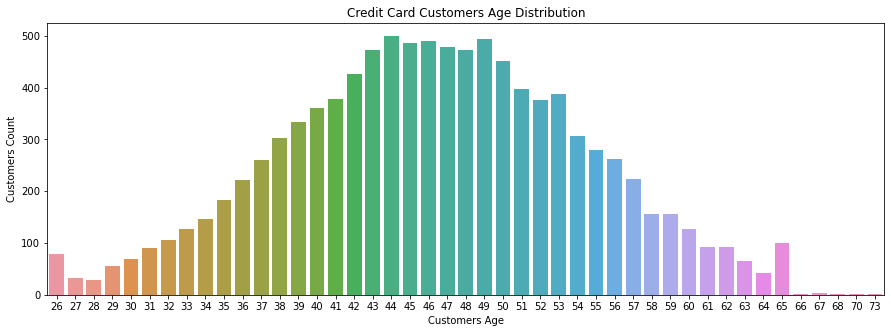

In [81]:
plt.figure(figsize=(15, 5))
sns.countplot(data = customers_df, x = 'Customer_Age')
plt.title('Credit Card Customers Age Distribution')
plt.ylabel('Customers Count')
plt.xlabel('Customers Age');

There is a lot of different categories for age, and that is pretty demanding on space, another way to visualize this graph is with the use of a histogram, so let's discover a good range of values to utilize.

In [54]:
print(f'The age of the customers in the dataset ranges from {customers_df.Customer_Age.min()} to {customers_df.Customer_Age.max()}')

The age of the customers in the dataset ranges from 26 to 73


Now that we know that the range of values goes from 26-73, we can choose close values to define our histogram area, and a valid bin size.

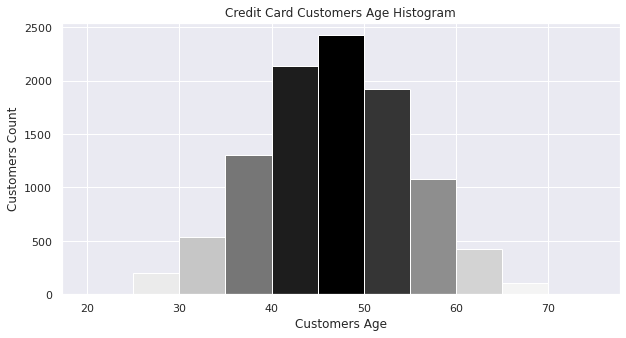

In [101]:
from matplotlib import colors

plt.figure(figsize=(10, 5))
N, bins, patches = plt.hist(customers_df.Customer_Age, bins=np.arange(20,80,5))

height_to_color = N / N.max()

norm = colors.Normalize(height_to_color.min(), height_to_color.max())

for thisheight, thispatch in zip(height_to_color, patches):
    color = plt.cm.gist_yarg(norm(thisheight))
    thispatch.set_facecolor(color)
    
plt.title('Credit Card Customers Age Histogram')
plt.ylabel('Customers Count')
plt.xlabel('Customers Age');

With the histogram, we can still see the format of a normal tendency, and also in age groups format, that demands less space to our plotting. It appears that the higher majority of customers of credit cards of the bank are between 40 and 55 years old.

### <font color=blue>Gender</font>

In [22]:
gender_count = customers_df.Gender.value_counts()
gender_count

F    5358
M    4769
Name: Gender, dtype: int64

Seems there are more Female customers in our dataset, let's visualize in a pie chart.

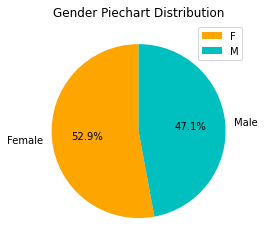

In [23]:
plt.pie(gender_count, startangle = 90, labels = ['Female', 'Male'], colors = ['orange', 'c'], autopct='%1.1f%%')
plt.title('Gender Piechart Distribution')
plt.legend(['F', 'M']);

In [20]:
f'{round((52.9 - 47.1), 2)}' + '%'

'5.8%'

Nearly 53% of the customers are registered as Female, almost 6% higher than the number of people with the Male Gender in our data. The reasons for the difference can be further explored in future projects.

### <font color = blue>Dependent Count</font>

In [91]:
dependent_count = customers_df.Dependent_count.value_counts()
dependent_count

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

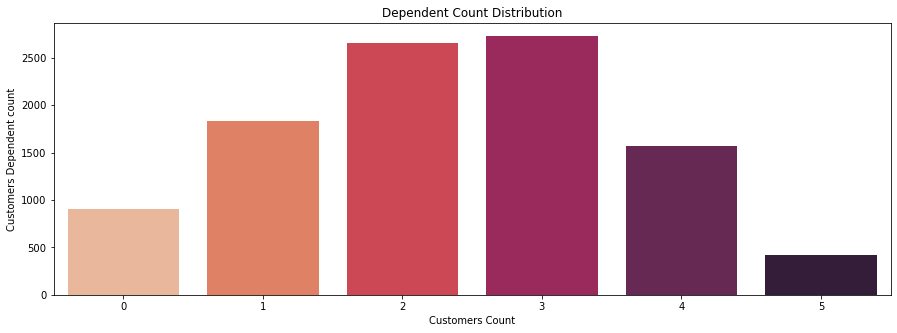

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(data = customers_df, x = 'Dependent_count', palette = 'rocket_r')
plt.title('Dependent Count Distribution')
plt.xlabel('Customers Count')
plt.ylabel('Customers Dependent count');

The largest part of the dependent count data is between 2 and 3, maybe people with 2 or 3 sons are more likely to get credit cards, or maybe it is the most frequent number for another reason. For now let's visualize the divergence between the total number of dependent count from 3 to 2.

In [59]:
majority_dependent_count_df = customers_df.Dependent_count.value_counts()[[2, 3]]
majority_dependent_count_df

2    2655
3    2732
Name: Dependent_count, dtype: int64

In [109]:
majority_dependent_count_percentage_df = majority_dependent_count_df / customers_df.Dependent_count.shape[0]
majority_dependent_count_percentage_df = majority_dependent_count_percentage_df.round(3)
majority_dependent_count_percentage_df

2    0.262
3    0.270
Name: Dependent_count, dtype: float64

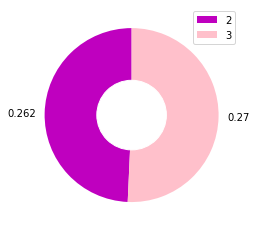

In [110]:
plt.pie(majority_dependent_count_df, startangle = 90, colors = ['m', 'pink'], normalize = True, labels = majority_dependent_count_percentage_df)
circle = plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(majority_dependent_count_df.index)
plt.show()

The difference between each other is barely 0.01% with all customers in consideration.

### <font color=blue>Education Level</font>

In [116]:
customers_df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [30]:
order_education = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

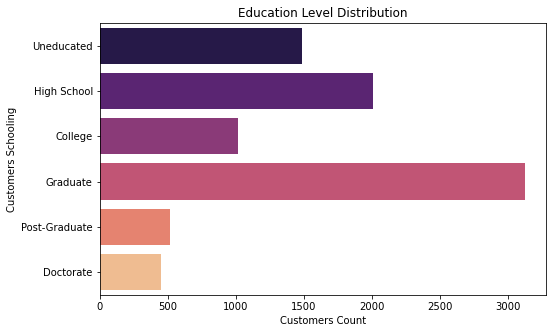

In [117]:
plt.figure(figsize=(8, 5))
sns.countplot(data = customers_df, 
              y = 'Education_Level', 
              palette = 'magma', 
              order = order_education)
plt.title('Education Level Distribution')
plt.xlabel('Customers Count')
plt.ylabel('Customers Schooling');

More than 2000 customers have the High School degree, while the majority of customers are Graduates.

### <font color=blue>Marital Status</font>

In [51]:
customers_df.Marital_Status.value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

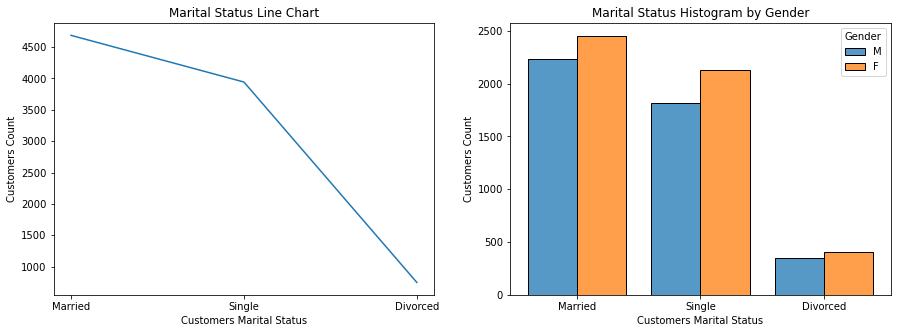

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(customers_df.Marital_Status.value_counts());
axes[0].set_title('Marital Status Line Chart')
axes[0].set_ylabel('Customers Count')
axes[0].set_xlabel('Customers Marital Status');

axes[1].set_title('Marital Status Histogram by Gender')
sns.histplot(data = customers_df, x = 'Marital_Status', hue = 'Gender', multiple = 'dodge', shrink=.8);
axes[1].set_ylabel('Customers Count')
axes[1].set_xlabel('Customers Marital Status');

We have more married customers than Single or Divorced, and with the second histogram we are able to see more clearly the marital distribution across different genders. Since the Female Gender is more frequent in our data, seems correct to assume that the female costumers has higher counts across this distribution.

### <font color=blue>Income Category</font>

In [49]:
customers_df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [95]:
order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

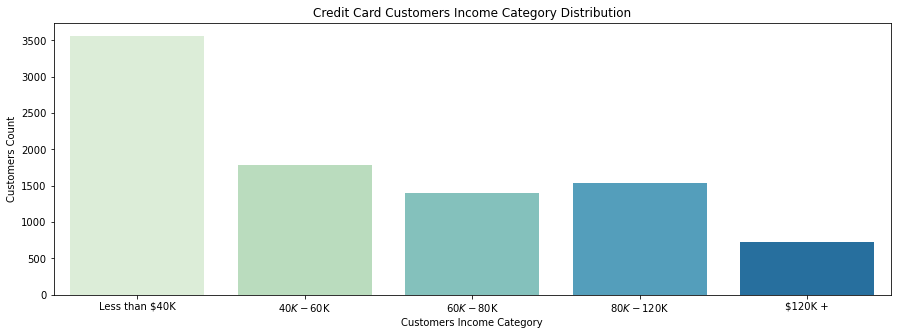

In [15]:
plt.figure(figsize=(15, 5))
sns.barplot(x = customers_df.Income_Category.value_counts().index, 
            y = customers_df.Income_Category.value_counts(),
            palette = 'GnBu',
            order = order)
plt.title('Credit Card Customers Income Category Distribution')
plt.xlabel('Customers Income Category')
plt.ylabel('Customers Count');

The category with the most customers of the bank analysed in this data set contains more customers on the `Less than $40k` income category.

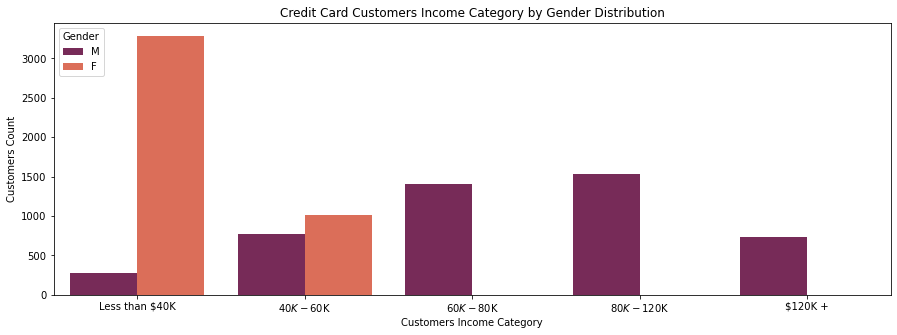

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data = customers_df, 
              x = 'Income_Category', 
              hue = 'Gender',
              palette = 'rocket',
              order = order)
plt.title('Credit Card Customers Income Category by Gender Distribution')
plt.xlabel('Customers Income Category')
plt.ylabel('Customers Count');

Now we can see a possible anomaly, with only having Females receiving `Less than $40K` and between `$40K - $60K` even though Female customers are in higher number in our dataset.

### <font color = Blue>Card Category</font>

In [38]:
customers_df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

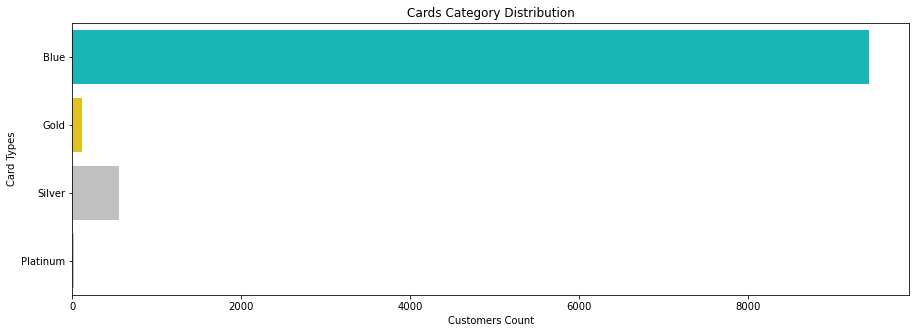

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(data = customers_df, y = 'Card_Category', palette = ['darkturquoise', 'gold', 'silver', 'silver'])
plt.title('Cards Category Distribution')
plt.xlabel('Customers Count')
plt.ylabel('Card Types');

Blue type cards has too many customers, so lets divide it from the rest.

In [126]:
cards_not_blue = customers_df.query('Card_Category != "Blue"')
cards_blue = customers_df.query('Card_Category == "Blue"')

Now that blue type got his own dataframe, we will Plot histograms by Income.

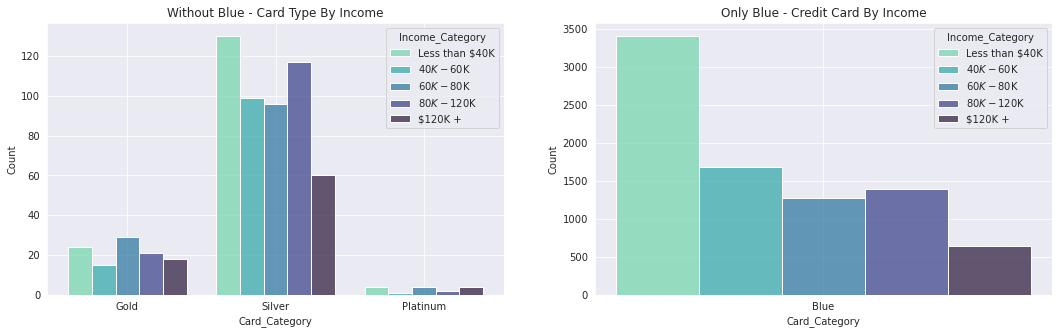

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

hue_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

axes[0].set_title('Without Blue - Card Type By Income')

sns.histplot(data = cards_not_blue, 
             x = 'Card_Category', 
             hue = 'Income_Category', 
             hue_order = hue_order, 
             multiple = 'dodge', 
             shrink=.8,
             palette = 'mako_r',
             ax = axes[0]);

axes[1].set_title('Only Blue - Credit Card By Income')
sns.histplot(data = cards_blue, 
             x = 'Card_Category', 
             hue = 'Income_Category', 
             hue_order = hue_order, 
             multiple = 'dodge', 
             shrink=.6, 
             palette = 'mako_r',
             ax = axes[1]);

Only a small number of clients uses other type of cards than blue, so maybe it's a good reason to look in more detail the reasons and to try change things like creating more benefits in having other type of cards.

### <font color = blue>Months on book</font>

In [32]:
customers_df.Months_on_book.describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

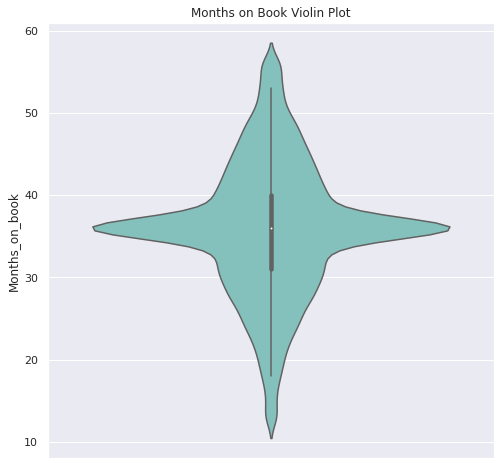

In [110]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.violinplot(data = customers_df, y = 'Months_on_book', palette = 'GnBu')
plt.title('Months on Book Violin Plot');

The middle point in the `Violin Plot` means the Median of `Months_on_book`. There is a higher probability of the customer being around the Median, represented by the light blue part of the plot.

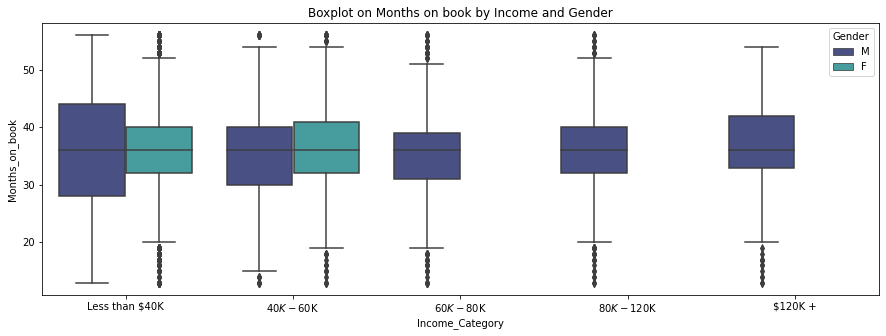

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = customers_df, 
            y = 'Months_on_book', 
            x = 'Income_Category', 
            hue = 'Gender', 
            palette = 'mako',
            order = order)
plt.title('Boxplot on Months on book by Income and Gender');

People of the female Gender have a lower variation between the months being customers. Also as visualized in the `Income_Category` analysis, there female customers are only present in the first two Income Categories.

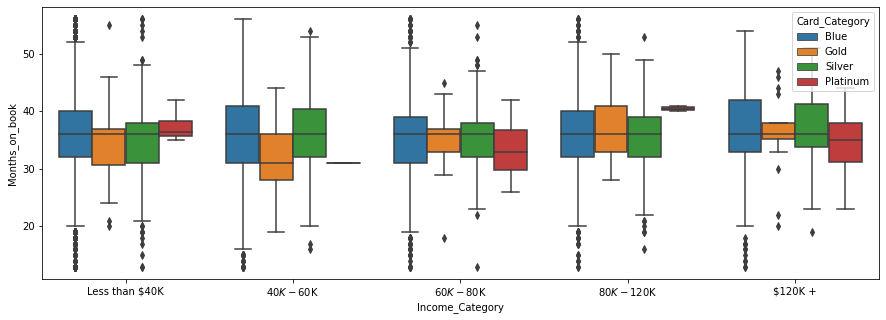

In [19]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = customers_df, 
            y = 'Months_on_book', 
            x = 'Income_Category', 
            hue = 'Card_Category', 
            order = order);

The Boxplot seems to be indicating that there is outliers in this data.

### <font color = blue>Credit Limit</font>

In [59]:
customers_df.Credit_Limit.describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

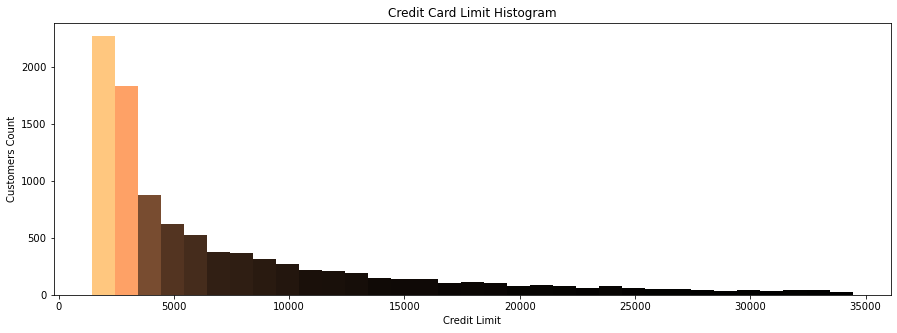

In [72]:
plt.figure(figsize=(15, 5))
N, bins, patches = plt.hist(customers_df.Credit_Limit, bins=np.arange(customers_df.Credit_Limit.min(),
                                                                             customers_df.Credit_Limit.max(),
                                                                             1000))

height_to_color = N / N.max()

norm = colors.Normalize(height_to_color.min(), height_to_color.max())

for thisheight, thispatch in zip(height_to_color, patches):
    color = plt.cm.copper(norm(thisheight))
    thispatch.set_facecolor(color)
    
plt.title('Credit Card Limit Histogram')
plt.ylabel('Customers Count')
plt.xlabel('Credit Limit');

There are all types of `Credit Limit`, from 1438.3K to 34516K, but credit limits between 1438.3K and a bit more than 5000K are more frequent. `Credit Limit` is normally evaluated by credit score, payment history, income, credit utilization and large expenses. We removed a few columns of our data set that would be usefull to correlate to the `Credit Limit`, but this is not the focus of this analysis, so now we'll try to search correlations with the data that we have at hand.

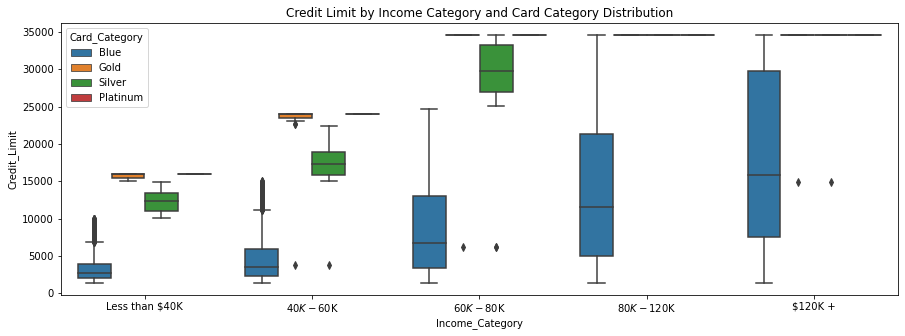

In [58]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = customers_df, 
            y = 'Credit_Limit', 
            x = 'Income_Category', 
            hue = 'Card_Category',       
            order = order);
plt.title('Credit Limit by Income Category and Card Category Distribution');

The better the income, the higher the limit, but as we can see, there are irregularities in some type of Cards for specific Incomes, probably because there are only a few customers on other credit types than blue. Let's visualize without the `Card Category` in consideration.

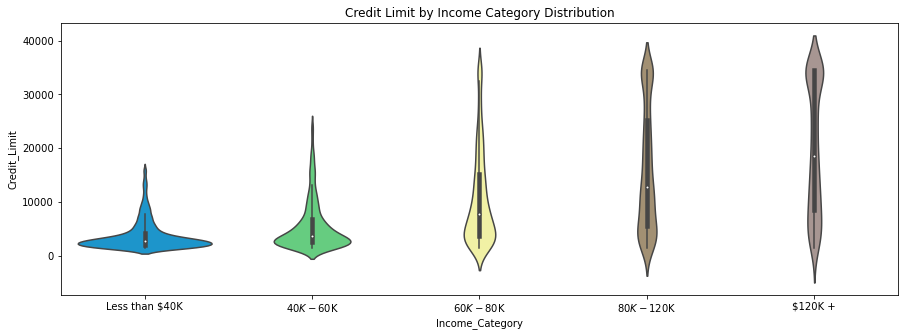

In [29]:
plt.figure(figsize = (15, 5))
sns.violinplot(data = customers_df, 
            y = 'Credit_Limit', 
            x = 'Income_Category',  
            palette = 'terrain',
            order = order)
plt.title('Credit Limit by Income Category Distribution');

This way we have a better picture about the `Credit Limit` by `Income Category`. There is a higher probability of our clients that have `Less than $40K` having `Credit Limit` lower than $10K.

## <font color=blue>Asking and Answering Questions</font>
***

Now that we already explored our data, we will try to ask and answer more profound questions about our dataset.

#### <font color = blue>Q1: What are the averages credit limits by card category?</font>

In [26]:
customers_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
0,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313.0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0


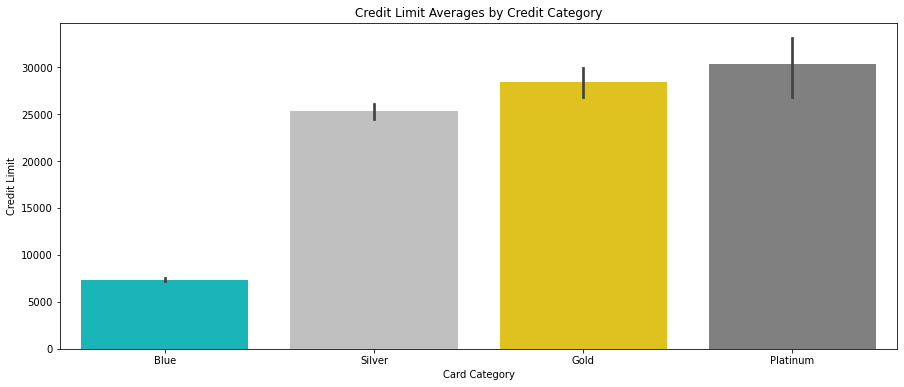

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x='Card_Category', 
            y='Credit_Limit', 
            data = customers_df, 
            order = ['Blue', 'Silver', 'Gold', 'Platinum'],
            palette = ['darkturquoise', 'silver', 'gold', 'gray'])
plt.title('Credit Limit Averages by Credit Category')
plt.ylabel('Credit Limit')
plt.xlabel('Card Category');

With this barplot of seaborn, that computes the average of the credit limit based on card category, we can see that platinum and gold have the most credit limit on average, with blue having the worst.

#### <font color = blue>Q2: Can we find and visualize correlations in this data?</font>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

We will utilize the pandas `corr` method to search for correlations in the numerical data.

In [82]:
customers_df.corr().round(4)

,Customer_Age,Dependent_count,Months_on_book,Credit_Limit
Customer_Age,1.0000,-0.1223,0.7889,0.0025
Dependent_count,-0.1223,1.0000,-0.1031,0.0681
Months_on_book,0.7889,-0.1031,1.0000,0.0075
Credit_Limit,0.0025,0.0681,0.0075,1.0000


The strongest correlation here seems to be between `Customer Age` and `Months on Book`. Let's create a scatterplot to visualize it.

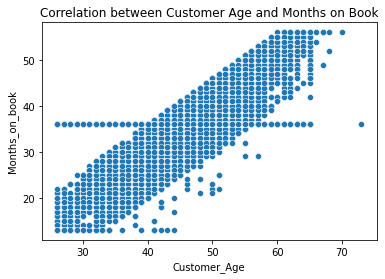

In [50]:
ax = sns.scatterplot(data = customers_df, x = 'Customer_Age', y = 'Months_on_book')
plt.title('Correlation between Customer Age and Months on Book');

The months on book variable doesn't seems to follow a normal distribution. We will use jointplot of Linear Regression to see the scatterplot + the histogram of the two columns of our data.

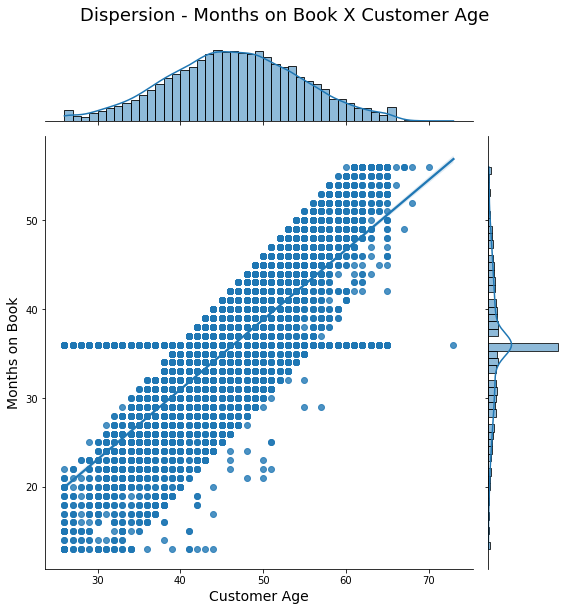

In [116]:
sns.reset_orig()
ax = sns.jointplot(data=customers_df, x='Customer_Age', y='Months_on_book', kind='reg', height=8)
ax.fig.suptitle('Dispersion - Months on Book X Customer Age', fontsize=18, y=1.05)
ax.set_axis_labels('Customer Age', 'Months on Book', fontsize=14);

There is a high peak in between 30 and 40, with value counts we can see it more clearly.

In [65]:
customers_df.Months_on_book.value_counts().head(5)

36    2463
37     358
34     353
38     347
39     341
Name: Months_on_book, dtype: int64

There is a disproportional amount of customers in the 36 months of this dataset, so it weakens the correlation.

#### <font color = blue>Q3: Who are the customers with the highest credit limit with age below 30 years?</font>

In [54]:
customers_df[customers_df.Customer_Age < 30].Credit_Limit.max()

34516.0

In [64]:
customers_df.Credit_Limit.max()

34516.0

In [83]:
customers_df.query('Customer_Age < 30 & Credit_Limit == 34516')

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
3657,29,F,0,Post-Graduate,Single,NaN,Gold,36,34516.0
8411,26,F,0,Uneducated,NaN,NaN,Silver,13,34516.0
9295,27,M,0,College,NaN,$80K - $120K,Silver,19,34516.0
9494,29,M,1,Graduate,Married,$80K - $120K,Silver,36,34516.0


We have 4 customers that have the highest limit available.

#### <font color = blue>Q4: How the customers age group changes the education level?</font>

We will start by getting the numbers to create our AgeGroup column.

In [13]:
customers_df.Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

To get `Age Groups` we have to create the labels and ranges, that will be applied with the pandas method `cut` based on the values in `Customer_Age`.

In [16]:
age_labels = ['26 - 35 years', '35 - 50 years', '50 - 65 years', '65 - 73 years']
age_bins = [26, 35, 50, 65, 73]

In [17]:
customers_df['AgeGroup'] = pd.cut(customers_df['Customer_Age'], bins = age_bins, labels = age_labels, include_lowest = True)

In [18]:
customers_df['AgeGroup'].value_counts()

35 - 50 years    6130
50 - 65 years    3068
26 - 35 years     919
65 - 73 years      10
Name: AgeGroup, dtype: int64

Now we will plot this relationship between Customers Schooling and Customers Age Groups.

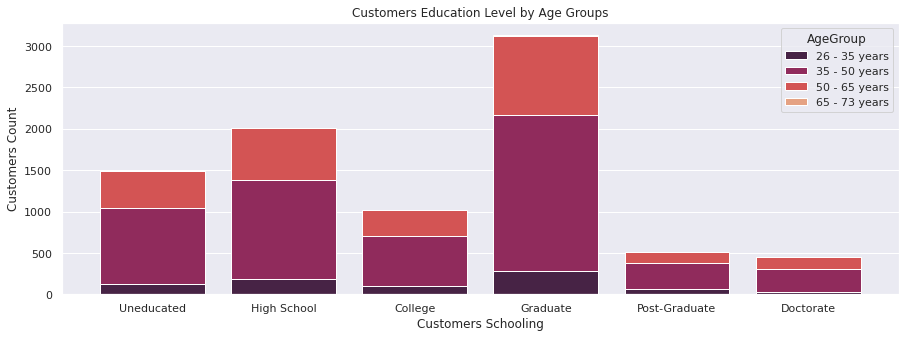

In [114]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(data=customers_df,
                   x="Education_Level", 
                   hue='AgeGroup', 
                   palette='rocket', 
                   dodge=False, 
                   order=order_education,
                   hue_order = age_labels
                   )
ax.set(xlabel="Customers Schooling", ylabel='Customers Count')
ax.set_title('Customers Education Level by Age Groups')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()
ax.autoscale()

In the stacked bar plot we compare only the same colors with each other. We have the `Graduate` being the most frequent Schooling for the first three `Age Groups`, with only having 10 people in the last one we can't properly visualize it. `High school` is the second most frequent in our data and it's rare for people with `26 - 35 years` having `Doctorate` in our data set.

## <font color=blue>Inferences and Conclusion</font>
***

In the project we have analyzed the customers data and got a glimpse on the dataset. Here is the summary of some inferences:

- The customers age ranges from `26 to 73 years`, with the ages between `40 and 55 years` being the most frequent in our data.

- We have more `Female` customers than `Male` ones.

- It is more frequent the credit card clients having `2 or 3 dependents`.

- The probability of a customer being a Graduate is higher than other `Education Level`.

- We have more married customers.

- The majority of our customers have an `Income Category` of `Less than 40K`, where even though we have more Female customers, the income of those is tied to `Less than 40K` and between `40K - 60K`.

- `Blue` is the `Card Category` with the most number of customers, so maybe it's a good time to look in more detail the benefits of each card type to try to get more clients interested in the other categories.

- We have more data on customers with 36 `Months on book`, that weakens our correlation analysis with `Customers Age`.

- `Credit limits` between `1438.3K and 5000K` are more frequent. Also, we have 4 customers that have less than 30 years that have the highest limit, being `34516.0K`.



We could observe in our analysis a quick view of our customers, obtaining distribution information like `Age, General Marital Status, Income, and others`. With the data of our customers being available, it is necessary to correctly analyze key points that can be positive turning points to our company. The market is more and more competitive and it is important to measure correctly our data, to be able to plan for the future.

## <font color=blue>References and Future Work</font>
***

The follow tools and resources were used in the project:

Credit Card Customers Dataset - https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers <br/>
Data Analysis with Python: Zero to Pandas - https://jovian.com/learn/data-analysis-with-python-zero-to-pandas <br/>
Numpy - https://numpy.org/ <br/>
Matplotlib - https://matplotlib.org/ <br/>
Matplotlib Histogram - https://matplotlib.org/stable/gallery/statistics/hist.html <br/>
Pandas - https://pandas.pydata.org/ <br/>
Seaborn - https://seaborn.pydata.org/ <br/>
Stacked barchart reading - https://www.storytellingwithdata.com/blog/stacked-bars <br/>
Stacked Seaborn countplot - https://stackoverflow.com/questions/67113579/make-a-stacked-bar-plot-from-seaborn-to-matplotlib <br/>


As future work we can make iterations in the process already made in this project, do more inferences about our full dataset, exploring other aspects of the data, and also use it to work on the original intentions of the dataset origin, that is to make a model to predict churning customers.